<a href="https://colab.research.google.com/github/adityapatil4141/Deep-learning/blob/main/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [62]:
x,y = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

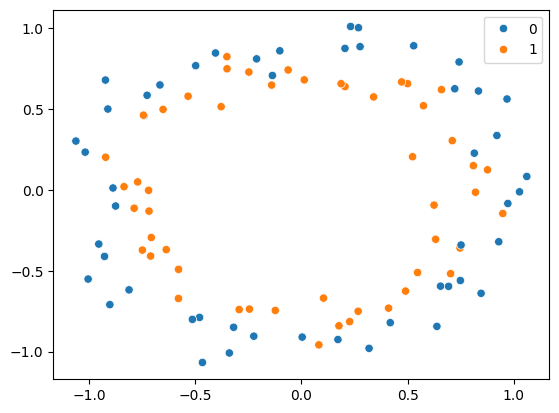

In [63]:
sns.scatterplot(x = x[:,0],y = x[:,1],hue = y)

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [65]:
model = Sequential()

model.add(Dense(256, activation='relu',input_dim=2))
model.add(Dense(1, activation='sigmoid'))


In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               768       
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [68]:
history = model.fit(x_train,y_train,epochs=3500,verbose=0,validation_data=(x_test,y_test))

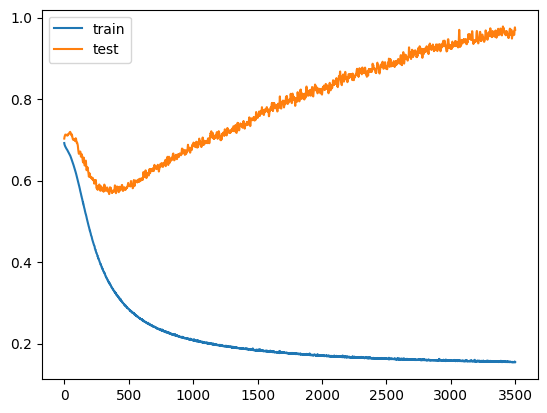

In [69]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

In [70]:
# Till one point test data's loss was reducing. but after it started increasing.
# But, Loss of training data was reducing continuously.
# This gap between both curve shows overfitting!

# EarlyStopping

In [71]:
model = Sequential()

model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [72]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [76]:
callback = EarlyStopping(
    monitor= 'val_loss',
    min_delta = 0.00001,
    patience = 25,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights= False
)

In [77]:
historyy = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 41ms/step - loss: 0.6747 - accuracy: 0.5750 - val_loss: 0.7156 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.6745 - accuracy: 0.5750 - val_loss: 0.7161 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 29ms/step - loss: 0.6735 - accuracy: 0.5750 - val_loss: 0.7160 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6728 - accuracy: 0.5750 - val_loss: 0.7154 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 25ms/step - loss: 0.6722 - accuracy: 0.5750 - val_loss: 0.7147 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6715 - accuracy: 0.5750 - val_loss: 0.7140 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6710 - accuracy: 0.5875 - val_loss: 0.7135 - val_accuracy: 0.4000
Epoch 8/3500


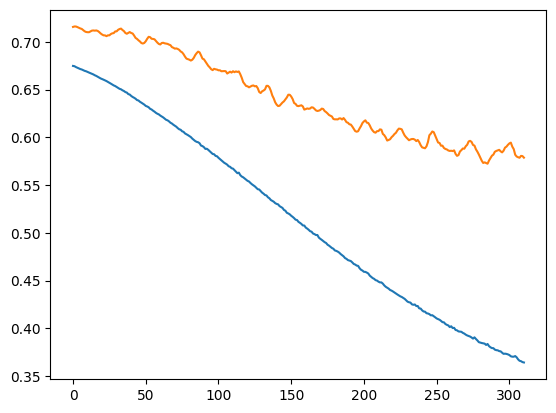

In [78]:
plt.plot(historyy.history['loss'],label='train')
plt.plot(historyy.history['val_loss'],label='test')